In [ ]:
import torch
#generated by puffin_D_synthetic_screen.py
screen1c = torch.load('./data/puffin_D_denovotss_screen.pth')

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
def match(a, b):
    bdict = {bb: i for i, bb in enumerate(b)}
    return np.array([bdict[aa] for aa in a])

import seaborn
%matplotlib inline
targets = ['FANTOM CAGE','ENCODE CAGE', "ENCODE RAMPAGE", 'GRO-cap', 'PRO-cap']
plot_positions = []
plot_gcs = []
plot_motifs = []
plot_ns = []
plot_targets = []
plot_strands = []



mydataset = screen1c['alts']
mydataset_pos =  screen1c['alts_pos']
mysources = screen1c['i_s']
mytargets = screen1c['t_s']
mytarget_monofreq = None
mymotif_choices = screen1c['motif_choices']
mymotif_positions = screen1c['motif_positions']
regionlen = 200
myunique_motifs = screen1c['unique_motifs']



for ii in range(5):
    print(ii)
    for strand in ['+', '-']:
        print(strand)
        if strand == '+':
            tssdataset_i = ii
        else:
            tssdataset_i = -(ii+1)
        n_tops = 10000

        inds = mysources[np.argsort(mydataset[:,tssdataset_i])[-n_tops:]][::-1]

        maxpos = mydataset_pos[:,tssdataset_i][np.argsort(mydataset[:,tssdataset_i])[-n_tops:]][::-1]
        
        toptss_motifpos = defaultdict(list)
        toptss_gc = defaultdict(list)

        a = np.vstack([np.array(myunique_motifs)[mymotif_choices[inds,:]][np.arange(len(inds)), np.argsort(mymotif_positions[inds,:])[:,i]] for i in range(mymotif_choices.shape[1])]).T.flatten()
        b = (np.sort(mymotif_positions[inds,:], axis=1)-(maxpos-regionlen/2)[:,None]).flatten()


        for aa, bb in zip(a,b):
            toptss_motifpos[aa].append(bb)

        for i, k in enumerate(sorted(toptss_motifpos.keys())):
            plot_positions.append(toptss_motifpos[k])
            if mytarget_monofreq is not None:
                plot_gcs.append(toptss_gc[k])
            plot_motifs.append(np.repeat(k, len(toptss_motifpos[k])))
            plot_ns.append(np.repeat(len(toptss_motifpos[k]), len(toptss_motifpos[k])))
            plot_targets.append(np.repeat(targets[ii], len(toptss_motifpos[k])))
            plot_strands.append(np.repeat(strand, len(toptss_motifpos[k])))

plotdata = pd.DataFrame(dict(position=np.concatenate(plot_positions), 
                             motif=np.concatenate(plot_motifs), 
                             n=np.concatenate(plot_ns),
                             target = np.concatenate(plot_targets),
                             strand = np.concatenate(plot_strands)))
    
if mytarget_monofreq is not None:
    plotdata['gc']=np.concatenate(plot_gcs)

0
+
-
1
+
-
2
+
-
3
+
-
4
+
-


In [ ]:
toptss_motifdesign = np.zeros((10000,len(myunique_motifs), len(targets)*2))

toptss_motifdesign.fill(np.nan)
for t in range(2*len(targets)):
    inds = np.argsort(mydataset[:,t])[-10000:]
    for i in range(mymotif_choices.shape[1]):
        toptss_motifdesign[np.arange(10000), mymotif_choices[mysources[inds],i], t] = mymotif_positions[mysources[inds],i]-(mydataset_pos[inds,t]-regionlen/2)


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R 
require(scales)
theme_Publication <- function(base_size=14, base_family="helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(1, "cm"),
               legend.margin = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}
scale_fill_Publication <- function(...){
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}
scale_colour_Publication <- function(...){
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

R[write to console]: Saving 20 x 12 in image



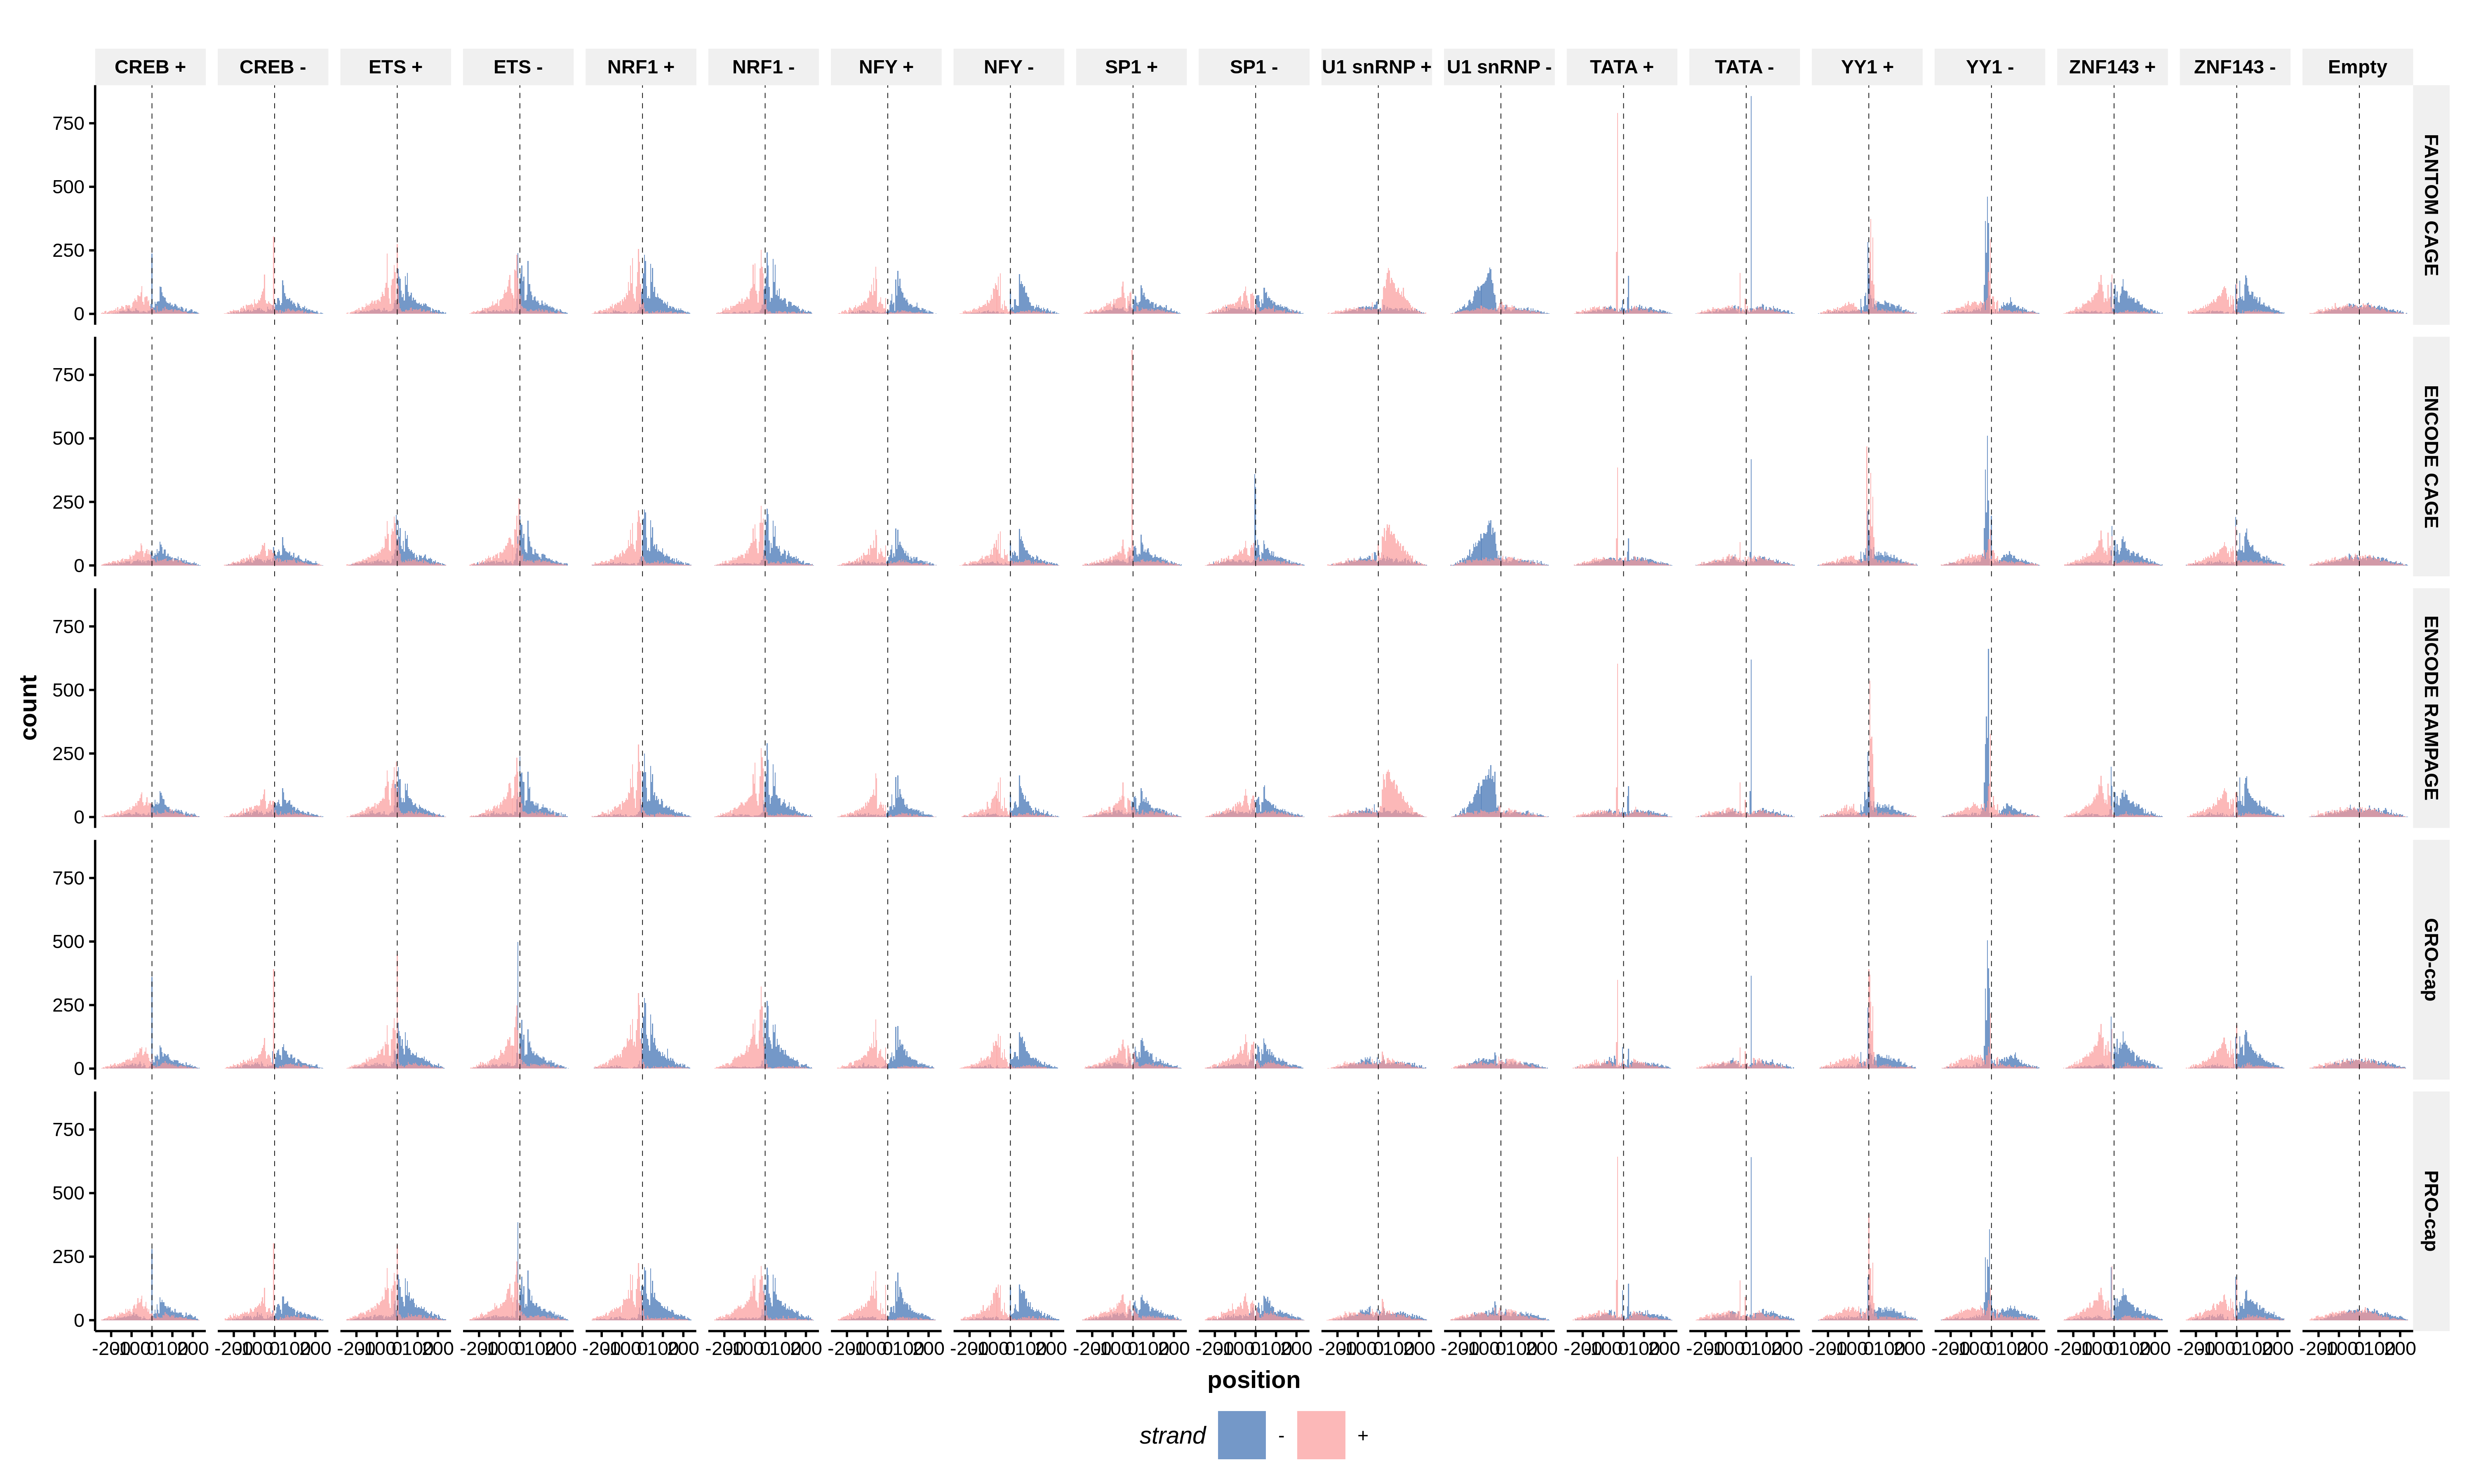

In [ ]:
%%R -i plotdata -w 20 -h 12 --units in -r 300
require(ggplot2)
require(data.table)
plotdata = data.table(plotdata)

plotdata$motif = factor(plotdata$motif, levels= c('CREB','CREB-rev', 'ETS', 'ETS-rev', 'NRF1', 'NRF1-rev', 'NFY', 'NFY-rev', 'SP1','SP1-rev','5-splice-site','5-splice-site-rev','TATA','TATA-rev','YY1','YY1-rev','ZNF143','ZNF143-rev','Empty'))
levels(plotdata$motif)<- c('CREB +','CREB -', 'ETS +', 'ETS -', 'NRF1 +', 'NRF1 -', 'NFY +', 'NFY -', 'SP1 +','SP1 -','U1 snRNP +','U1 snRNP -','TATA +','TATA -','YY1 +','YY1 -','ZNF143 +','ZNF143 -','Empty')
plotdata$target = factor(plotdata$target, levels = c('FANTOM CAGE', 'ENCODE CAGE','ENCODE RAMPAGE', 'GRO-cap','PRO-cap'))
p = ggplot(plotdata)+geom_histogram(aes(x=position, fill=strand),bins=100,size=I(0.1),alpha=I(0.7), position ='identity')+
    facet_grid(target~motif)+theme_Publication()+scale_fill_manual(values=c("#386cb0", "#fb9a99"))+
    geom_vline(xintercept=0, linetype=2, size=I(0.2))
ggsave('./figures/synthetic_tss_screen.pdf', device=cairo_pdf)
p

In [ ]:
name_motifs = { 'SP1':'GGGCGGGG',
    'SP1-rev': 'CCCCGCCC',
    'CREB': 'AATGACGTGA',
    'CREB-rev': 'TCACGTCATT',
    'ETS': 'ACTTCCGGT',
    'ETS-rev': 'ACCGGAAGT',
    '5-splice-site': 'AGGTAAG',
    '5-splice-site-rev': 'CTTACCT',
    'NRF1': 'GCGCATGCGC',
    'NRF1-rev': 'GCGCATGCGC',
    'YY1': 'AAAATGGCGGC',
    'YY1-rev': 'GCCGCCATTTT',
    'TATA': 'CTATAAAA',
    'TATA-rev': 'TTTTATAG',
    'NFY': 'CAGCCAATCAGA',
    'NFY-rev': 'TCTGATTGGCTG',
    'ZNF143':'ACTACATTTCCCAGAATGCATTGCG',
    'ZNF143-rev':'CGCAATGCATTCTGGGAAATGTAGT',
     'Empty':''}



unique_motifs = sorted(name_motifs.keys())

In [ ]:
plotdata = pd.DataFrame(toptss_motifdesign[:,:,0], columns=['U1 snRNP +',
 'U1 snRNP -',
 'CREB +',
 'CREB -',
 'ETS +',
 'ETS -',
 'Empty',
 'NFY +',
 'NFY -',
 'NRF1 +',
 'NRF1 -',
 'SP1 +',
 'SP1 -',
 'TATA +',
 'TATA -',
 'YY1 +',
 'YY1 -',
 'ZNF143 +',
 'ZNF143 -'])

In [ ]:
plotdata = plotdata.loc[:,[
'U1 snRNP +',
 'CREB +',
 'CREB -',
 'ETS +',
 'ETS -',
 'Empty',
 'NFY +',
 'NFY -',
 'NRF1 +',
 'SP1 +',
 'SP1 -',
 'TATA +',
 'YY1 +',
 'ZNF143 +',
 'ZNF143 -']]

R[write to console]: Saving 100 x 100 in image

R[write to console]: 
R[write to console]:  plot: [1,1] [--------------------------------------------------]  0% est: 0s 
R[write to console]: 
R[write to console]:  plot: [1,2] [--------------------------------------------------]  1% est: 9s 
R[write to console]: 
R[write to console]:  plot: [1,3] [>-------------------------------------------------]  1% est:14s 
R[write to console]: 
R[write to console]:  plot: [1,4] [>-------------------------------------------------]  2% est:14s 
R[write to console]: 
R[write to console]:  plot: [1,5] [>-------------------------------------------------]  2% est:13s 
R[write to console]: 
R[write to console]:  plot: [1,6] [>-------------------------------------------------]  3% est:13s 
R[write to console]: 
R[write to console]:  plot: [1,7] [=>------------------------------------------------]  3% est:13s 
R[write to console]: 
R[write to console]:  plot: [1,8] [=>---------------------------------------

R[write to console]: 
R[write to console]:  plot: [5,8] [==============>-----------------------------------] 30% est: 7s 
R[write to console]: 
R[write to console]:  plot: [5,9] [==============>-----------------------------------] 31% est: 7s 
R[write to console]: 
R[write to console]:  plot: [5,10] [==============>----------------------------------] 31% est: 7s 
R[write to console]: 
R[write to console]:  plot: [5,11] [==============>----------------------------------] 32% est: 7s 
R[write to console]: 
R[write to console]:  plot: [5,12] [===============>---------------------------------] 32% est: 7s 
R[write to console]: 
R[write to console]:  plot: [5,13] [===============>---------------------------------] 32% est: 7s 
R[write to console]: 
R[write to console]:  plot: [5,14] [===============>---------------------------------] 33% est: 7s 
R[write to console]: 
R[write to console]:  plot: [5,15] [===============>---------------------------------] 33% est: 7s 
R[write to console]: 
R[

R[write to console]:  plot: [9,15] [============================>--------------------] 60% est: 4s 
R[write to console]: 
R[write to console]:  plot: [10,1] [=============================>-------------------] 60% est: 4s 
R[write to console]: 
R[write to console]:  plot: [10,2] [=============================>-------------------] 61% est: 4s 
R[write to console]: 
R[write to console]:  plot: [10,3] [=============================>-------------------] 61% est: 4s 
R[write to console]: 
R[write to console]:  plot: [10,4] [=============================>-------------------] 62% est: 4s 
R[write to console]: 
R[write to console]:  plot: [10,5] [=============================>-------------------] 62% est: 4s 
R[write to console]: 
R[write to console]:  plot: [10,6] [==============================>------------------] 63% est: 4s 
R[write to console]: 
R[write to console]:  plot: [10,7] [==============================>------------------] 63% est: 4s 
R[write to console]: 
R[write to console]:  pl

R[write to console]: 
R[write to console]:  plot: [14,8] [===========================================>-----] 90% est: 1s 
R[write to console]: 
R[write to console]:  plot: [14,9] [===========================================>-----] 91% est: 1s 
R[write to console]: 
R[write to console]:  plot: [14,10] [===========================================>----] 91% est: 1s 
R[write to console]: 
R[write to console]:  plot: [14,11] [===========================================>----] 92% est: 1s 
R[write to console]: 
R[write to console]:  plot: [14,12] [===========================================>----] 92% est: 1s 
R[write to console]: 
R[write to console]:  plot: [14,13] [===========================================>----] 92% est: 1s 
R[write to console]: 
R[write to console]:  plot: [14,14] [============================================>---] 93% est: 1s 
R[write to console]: 
R[write to console]:  plot: [14,15] [============================================>---] 93% est: 1s 
R[write to console]: 
R[

R[write to console]: 
R[write to console]:  plot: [3,15] [=========>---------------------------------------] 20% est: 7s 
R[write to console]: 
R[write to console]:  plot: [4,1] [=========>----------------------------------------] 20% est: 7s 
R[write to console]: 
R[write to console]:  plot: [4,2] [=========>----------------------------------------] 21% est: 7s 
R[write to console]: 
R[write to console]:  plot: [4,3] [==========>---------------------------------------] 21% est: 7s 
R[write to console]: 
R[write to console]:  plot: [4,4] [==========>---------------------------------------] 22% est: 7s 
R[write to console]: 
R[write to console]:  plot: [4,5] [==========>---------------------------------------] 22% est: 7s 
R[write to console]: 
R[write to console]:  plot: [4,6] [==========>---------------------------------------] 23% est: 7s 
R[write to console]: 
R[write to console]:  plot: [4,7] [===========>--------------------------------------] 23% est: 7s 
R[write to console]: 
R[

R[write to console]:  plot: [8,7] [========================>-------------------------] 50% est: 5s 
R[write to console]: 
R[write to console]:  plot: [8,8] [========================>-------------------------] 50% est: 5s 
R[write to console]: 
R[write to console]:  plot: [8,9] [========================>-------------------------] 51% est: 5s 
R[write to console]: 
R[write to console]:  plot: [8,10] [========================>------------------------] 51% est: 5s 
R[write to console]: 
R[write to console]:  plot: [8,11] [========================>------------------------] 52% est: 5s 
R[write to console]: 
R[write to console]:  plot: [8,12] [========================>------------------------] 52% est: 5s 
R[write to console]: 
R[write to console]:  plot: [8,13] [=========================>-----------------------] 52% est: 5s 
R[write to console]: 
R[write to console]:  plot: [8,14] [=========================>-----------------------] 53% est: 5s 
R[write to console]: 
R[write to console]:  pl

R[write to console]: 
R[write to console]:  plot: [12,15] [=====================================>----------] 80% est: 2s 
R[write to console]: 
R[write to console]:  plot: [13,1] [======================================>----------] 80% est: 2s 
R[write to console]: 
R[write to console]:  plot: [13,2] [=======================================>---------] 81% est: 2s 
R[write to console]: 
R[write to console]:  plot: [13,3] [=======================================>---------] 81% est: 2s 
R[write to console]: 
R[write to console]:  plot: [13,4] [=======================================>---------] 82% est: 2s 
R[write to console]: 
R[write to console]:  plot: [13,5] [=======================================>---------] 82% est: 2s 
R[write to console]: 
R[write to console]:  plot: [13,6] [========================================>--------] 83% est: 2s 
R[write to console]: 
R[write to console]:  plot: [13,7] [========================================>--------] 83% est: 2s 
R[write to console]: 
R[

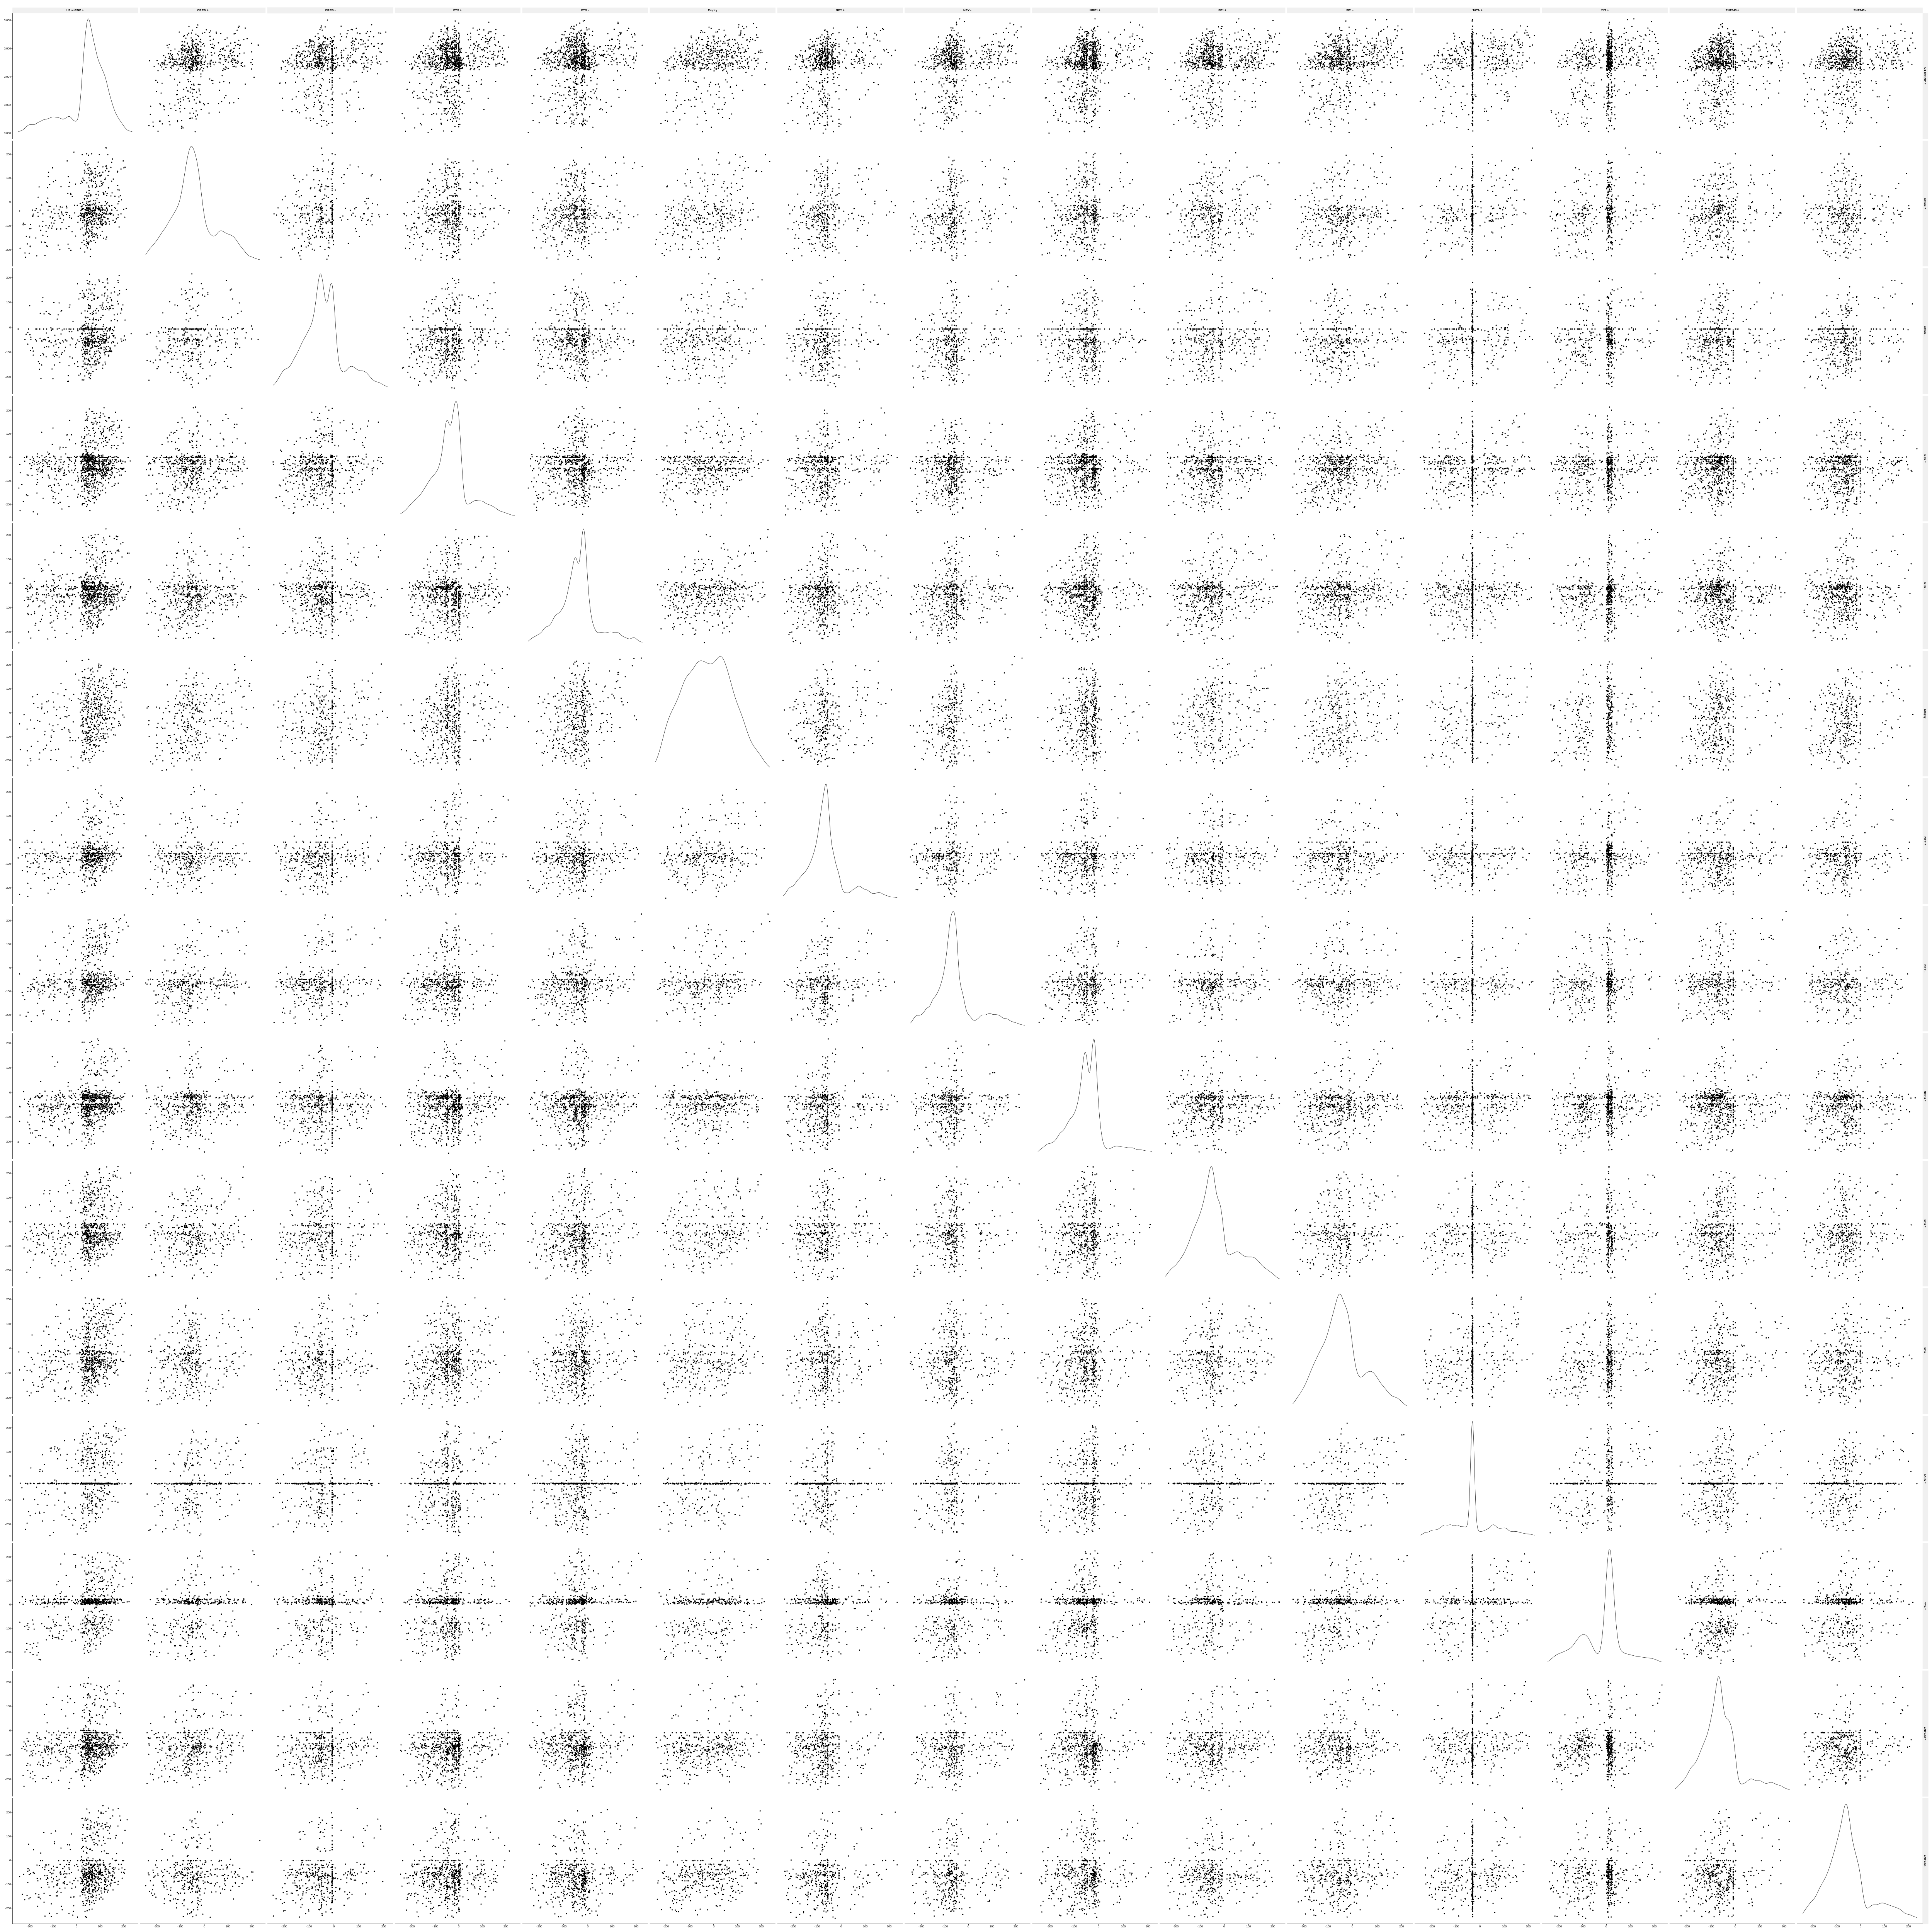

In [ ]:
%%R -i plotdata -w 100 -h 100 --units in -r 50
library(GGally)

p = ggpairs(plotdata,shape = ".",size=I(0.01),  upper = list(continuous = "points"))+theme_Publication()+scale_size_continuous(range=c(0,6))
ggsave('./figures/synthetic_tss_screen.pairdist.pdf', p, device=cairo_pdf,limitsize = FALSE)
p
